# Introduction to Neural Force Field

This Jupyter Notebook contains an introduction to the `nff` package. Here, we will load the modules and functions from `nff` to import a dataset, create dataloaders, create a model, train it and check the test stats. We will do most of it manually to illustrate the usage of the API. However, scripts such as the one provided in the `scripts/` folder already automate most of this process.

After the `nff` package has been installed, we start by importing all dependencies for this tutorial.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import sys

# sys.path.insert(0, "/home/saxelrod/Repo/projects/covid_nff/NeuralForceField")
# import torch
# import pdb
# import numpy as np

# from nff.utils.scatter import scatter_add
# from nff.nn.utils import chemprop_msg_update, chemprop_msg_to_node

# h = torch.tensor([[0.5488, 0.7152, 0.6028],
#                 [0.5449, 0.4237, 0.6459],
#                 [0.4376, 0.8918, 0.9637],
#                 [0.3834, 0.7917, 0.5289],
#                 [0.5680, 0.9256, 0.0710],
#                 [0.0871, 0.0202, 0.8326]])
# nbrs = torch.tensor([[1, 2],
#                 [2, 1],
#                 [2, 3],
#                 [3, 2],
#                 [2, 4],
#                 [4, 2]])
# h_12, h_31, h_23, h_32, h_24, h_42 = h

# # m_{vw} = \sum_{k in N(v) \ w} h_{kv}
# # m = [m_{12}, m_{21}, m_{23}, m_{32}, m_{24}, m_{42}]
# # = [0, h_{32} + h_{42}, h_{12} + h_{42}, 0, h_{12} + h_{32},
# #    0]

# m = chemprop_msg_update(h, nbrs)
# print(m)

# # >> tensor([[0.0000, 0.0000, 0.0000],
# #         [0.4706, 0.8119, 1.3615],
# #         [0.6359, 0.7354, 1.4354],
# #         [0.0000, 0.0000, 0.0000],
# #         [0.9323, 1.5069, 1.1317],
# #         [0.0000, 0.0000, 0.0000]])

# expec_m = torch.stack([0 * h_32, h_32+ h_42, h_12 + h_42, h_12 + h_32, 0 *h_12])
# print(expec_m)

# # >> tensor([[0.0000, 0.0000, 0.0000],
# #         [0.4706, 0.8119, 1.3615],
# #         [0.6359, 0.7354, 1.4354],
# #         [0.0000, 0.0000, 0.0000],
# #         [0.9323, 1.5069, 1.1317],
# #         [0.0000, 0.0000, 0.0000]])

In [3]:
# h = torch.tensor([[0.5488, 0.7152, 0.6028],
#                 [0.5449, 0.4237, 0.6459],
#                 [0.4376, 0.8918, 0.9637],
#                 [0.3834, 0.7917, 0.5289],
#                 [0.5680, 0.9256, 0.0710],
#                 [0.0871, 0.0202, 0.8326]])
# nbrs = torch.tensor([[1, 2],
#                 [2, 1],
#                 [2, 3],
#                 [3, 2],
#                 [2, 4],
#                 [4, 2]])
# h_12, h_21, h_23, h_32, h_24, h_42 = h
# num_nodes = 5

# # m_v = \sum_{w \in N(v)} h_{vw}
# # = [m_0, m_1, m_2, m_3, m_4]
# # = [0, h_12, h_21 + h_23 + h_24, h_32 , h_42]

# m = chemprop_msg_to_node(h, nbrs, 5)
# print(m)

# expec_m = torch.stack([torch.zeros_like(h_12),
#             h_12, h_21 + h_23 + h_24, h_32, h_42])

# print(expec_m)

In [4]:
# import os 
# import django


# os.environ["DJANGO_SETTINGS_MODULE"]="djangochem.settings.orgel"

# django.setup()

# from pgmols.models import Species


# from nff.data import Dataset

# main_pth = ("/home/saxelrod/engaging_nfs/data_from_fock/data/"
#        "covid_data/covid_mmff94_1_50k_features.pth.tar")

# # main_pth = ("/home/saxelrod/engaging_nfs/data_from_fock/data/"
# #        "covid_data/all_crest_features.pth.tar")

# newest_dataset = Dataset.from_file(main_pth)

# # old_pth = ("/home/saxelrod/engaging_nfs/data_from_fock/data/"
# #        "covid_data/all_crest_features.pth.tar")
# # old_dataset = Dataset.from_file(old_pth)

In [5]:
# def check_dataset(dataset):
#     bind_idx = []
#     for i, smiles in enumerate(dataset.props['smiles']):
#         print(i)
#         spec = Species.objects.get(smiles=smiles, group__name='covid')
#         bind = spec.mol.details["sars_cov_one_cl_protease_active"]

#         bind_idx.append(i)
#     old_bind_idx = [i for i, bind in enumerate(dataset.props['bind'])]
#     print(bind_idx == old_bind_idx)
# check_dataset(newest_dataset)

In [6]:
# newest_dataset.props['bind'].sum()

In [7]:
# old_bind_idx = torch.LongTensor([i for i, bind in enumerate(old_dataset.props['bind']) if bind ])

# add_props = {}
# for key, val in old_dataset.props.items():
#     if type(val) is list:
#         add_props[key] = [val[i] for i in old_bind_idx]
#     else:
#         add_props[key] = val[old_bind_idx]

       

In [8]:
# for key, val in newest_dataset.props.items():
#     if type(val) is list:
#         newest_dataset.props[key] = val + add_props[key]
#     else:
#         newest_dataset.props[key] = torch.cat((val, add_props[key]), dim=0)

In [9]:
# newest_dataset.save(main_pth)

In [10]:
# import torch

# dataset.props['bind'] = []

# for i, smiles in enumerate(dataset.props['smiles']):
#     spec = Species.objects.get(smiles=smiles, group__name='covid')
#     bind = spec.mol.details["sars_cov_one_cl_protease_active"]
    
#     dataset.props['bind'].append(bind)

    
# dataset.props['bind'] = torch.LongTensor(dataset.props['bind'])



In [11]:
# old_bind_idx = [i for i, bind in enumerate(old_dataset.props['bind']) if bind ]
# new_bind_idx = [i for i, bind in enumerate(dataset.props['bind']) if bind ]

In [12]:
# print(len(old_bind_idx))
# print(len(new_bind_idx))

# print(len([i for i in new_bind_idx if i in old_bind_idx]))

In [13]:
# dataset.save(main_pth)

In [2]:
import sys
sys.path.insert(0, "..")

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve


import torch
from torch.optim import Adam
from torch.utils.data import DataLoader

from nff.data import (Dataset, split_train_validation_test, 
                      collate_dicts, to_tensor, ImbalancedDatasetSampler)
from nff.train import Trainer, get_trainer, get_model, load_model, loss, hooks, metrics, evaluate

from nff.hypopt.data import trim_confs

It might also be useful setting the GPU you want to use:

In [3]:
DEVICE = 0
BATCH_SIZE = 25
MINI_BATCHES = int(50 / BATCH_SIZE)

OUTDIR = './sandbox'

if os.path.exists(OUTDIR):
    newpath = os.path.join(os.path.dirname(OUTDIR), 'backup')
    if os.path.exists(newpath):
        shutil.rmtree(newpath)
        
    shutil.move(OUTDIR, newpath)

## Loading the relevant data

As we usually work with the database, we can pack their information in a class `Dataset`, which is a subclass of `torch.utils.data.Dataset`. It basically wraps information on the atomic numbers, energies, forces and SMILES strings for each one of the geometries. In this example, we already have a pre-compiled `Dataset` to be used. We start by loading this file and creating three slices of the original dataset

# THESE SPLITS ARE LOST - NEED TO REMAKE THEM

In [6]:
import os
base_pth = "/home/saxelrod/engaging_nfs/data_from_fock/data/covid_data/"

# main_pth = os.path.join(base_pth, "covid_mmff94_1_50k_features_aid.pth.tar")

main_pth = os.path.join(base_pth, "all_crest_features.pth.tar")



# suffixes = ["mmff94_50k_1_aid_train.pth.tar", "mmff94_50k_1_aid_val.pth.tar", 
#        "mmff94_50k_1_aid_test.pth.tar"]

suffixes = ["all_crest_train.pth.tar", "all_crest_val.pth.tar", 
       "all_crest_test.pth.tar"]


pths = [os.path.join(base_pth, suffix) for suffix in suffixes]


if all([os.path.isfile(file) for file in pths]):
    print("Loading from file...")
    train, val, test = [Dataset.from_file(pth) for pth in pths]
    print("Loaded from file.")
else:

    dataset = Dataset.from_file(main_pth)
#     dataset = clean(dataset)
    trim_confs(dataset, 1)
    train, val, test = split_train_validation_test(dataset, binary=True, targ_name='bind')
    for pth, dset in zip(pths, [train, val, test]):
        dset.save(pth)

    del dataset

In [23]:
dists = []
for i, batch in enumerate(dataset):
    a = batch["nbr_list"]
    xyz = batch['nxyz'][:, 1:]
    n = xyz.size(0)
    dist = (xyz.expand(n, n, 3) - xyz.expand(n, n, 3).transpose(0, 1)).pow(2).sum(dim=2
                                                    ).sqrt().max()
    dists.append(dist)
    

In [24]:
np.max(dists)

30.715797

In [17]:
print(train.props['bind'].sum())
print(val.props['bind'].sum())
print(test.props['bind'].sum())

tensor(237)
tensor(80)
tensor(80)


Create loaders with balanced datasets:

In [18]:
loaders = []

for split in [train, val, test]:
    props = split.props
    kwargs = {}
#     if split in [train, test]:
    if split in [train]:
#     if True:
        sampler = ImbalancedDatasetSampler(
            target_name="bind",
            props=props)
        kwargs.update({"sampler": sampler})
    loader = DataLoader(split, batch_size=BATCH_SIZE, 
                        collate_fn=collate_dicts,
                       **kwargs)
    loaders.append(loader)
    
train_loader, val_loader, test_loader = loaders

For example:

In [19]:
num_bind = 0
num_non_bind = 0

for batch in train_loader:
    bind = batch['bind'].sum()
    non_bind = len(batch['bind']) - bind
    
    num_bind += bind.item()
    num_non_bind += non_bind.item()
        
print(num_bind)
print(num_non_bind)
print(num_bind / (num_bind + num_non_bind))

1782
1731
0.5072587532023911


## Creating a model

`nff` is based on SchNet. It parameterizes interatomic interactions in molecules and materials through a series of convolution layers with continuous filters. Here, we are going to create a simple model using the hyperparameters given on `params`:

In [20]:
n_atom_basis = next(iter(train_loader))["atom_features"].shape[-1]
n_bond_features = next(iter(train_loader))["bond_features"].shape[-1]

n_bond_hidden = 300

n_filters = 30
# n_filters = 1

n_gaussians = 10
n_edge_hidden = n_bond_hidden + n_filters
n_mol_basis = 300


mol_fp_drop = 0.0
schnet_dropout = 0.5
cp_dropout = 0.0
readout_drop = 0.2


# mol_fp_drop = 0.0
# schnet_dropout = 0.0
# cp_dropout = 0.0
# readout_drop = 0.0

n_convolutions = 2


input_layers = [{'name': 'linear', 'param': {'in_features': n_bond_features + n_atom_basis,
                                         'out_features': n_bond_hidden}},
            {'name': 'ReLU', 'param': {}}]

output_layers = [{'name': 'linear', 'param': {'in_features': n_atom_basis + n_edge_hidden,
                                         'out_features': n_mol_basis}},
                {'name': 'ReLU', 'param': {}}]

readoutdict = {'bind': [
            {'name': 'linear', 'param' : { 'in_features': n_mol_basis, 'out_features': int(n_mol_basis / 2)}},
            {'name': 'ReLU', 'param': {}},
            {'name': 'Dropout', 'param': {'p': readout_drop}},
            {'name': 'linear', 'param' : { 'in_features': int(n_mol_basis / 2), 'out_features': 1}},
            {'name': 'sigmoid', 'param': {}},
        ]
    }


mol_fp_layers = []



params = {
    'n_atom_basis': n_atom_basis,
    'n_bond_hidden': n_bond_hidden,
    'input_layers': input_layers,
    'output_layers': output_layers,
    'n_filters': n_filters,
    'n_gaussians': n_gaussians,
    'cp_dropout': cp_dropout,
    'schnet_dropout': schnet_dropout,
    'gauss_embed': True,
    'n_convolutions': n_convolutions,
    'cutoff': 5.0,
    'trainable_gauss': True,
    'dropout_rate': schnet_dropout,
    'readoutdict': readoutdict,
    'boltzmann_dict': {'type': 'multiply'},
    'mol_fp_layers': mol_fp_layers,
    'same_filters': True
    
}



model = get_model(params, model_type="SchNetFeatures")

## Creating a trainer

In [21]:
model

SchNetFeatures(
  (convolutions): ModuleList(
    (0): CpSchNetConv(
      (dense): Dense(
        in_features=300, out_features=300, bias=False
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (activation): ReLU()
      (moduledict): ModuleDict(
        (edge_filter): Sequential(
          (0): GaussianSmearing()
          (1): Dense(
            in_features=10, out_features=30, bias=True
            (dropout): Dropout(p=0.5, inplace=False)
          )
          (2): ReLU()
        )
      )
    )
    (1): CpSchNetConv(
      (dense): Dense(
        in_features=300, out_features=300, bias=False
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (activation): ReLU()
      (moduledict): ModuleDict(
        (edge_filter): Sequential(
          (0): GaussianSmearing()
          (1): Dense(
            in_features=10, out_features=30, bias=True
            (dropout): Dropout(p=0.5, inplace=False)
          )
          (2): ReLU()
        )
      )
    )
  )
  (mol

To train our model with the data provided, we have to create a loss function. The easiest way to do that is through the `build_mse_loss` builder. Its argument `rho` is a parameter that will multiply the mean square error (MSE) of the force components before summing it with the MSE of the energy.

In [22]:
loss_fn = loss.build_cross_entropy_loss(loss_coef={'bind': 1})

We should also select an optimizer for our recently created model:

In [23]:
trainable_params = filter(lambda p: p.requires_grad, model.parameters())
optimizer = Adam(trainable_params, lr=1e-4)

### Metrics and hooks

If we want to monitor the progress of our training, say by looking at the mean absolute error (MAE) of energies and forces, we can simply create metrics to observe them:

In [24]:
train_metrics = [
    metrics.RocAuc('bind'),
    metrics.PrAuc('bind')
]

Furthermore, if we want to customize how our training procedure is done, we can use hooks which can interrupt or change the train automatically.

In our case, we are adding hooks to:
* Stop the training procedure after 100 epochs;
* Log the training on a machine-readable CSV file under the directory `./sandbox`;
* Print the progress on the screen with custom formatting; and
* Setup a scheduler for the learning rate.

In [25]:
train_hooks = [
    hooks.MaxEpochHook(1000),
    hooks.CSVHook(
        OUTDIR,
        metrics=train_metrics,
    ),
    hooks.PrintingHook(
        OUTDIR,
        metrics=train_metrics,
        separator = ' | ',
        time_strf='%M:%S'
    ),
    hooks.ReduceLROnPlateauHook(
        optimizer=optimizer,
        patience=10,
        factor=0.5,
        min_lr=1e-7,
        window_length=1,
        stop_after_min=True
    )
]

### Trainer wrapper

# ** no longer true: DON'T FORGET --- WE'RE CURRENTLY USING BONDED NBRS IN PLACE OF A FOR COMPARISON

A `Trainer` in the `nff` package is a wrapper to train a model. It automatically creates checkpoints, as well as trains and validates a given model. It also allow further training by loading checkpoints from existing paths, making the training procedure more flexible. Its functionalities can be extended by the hooks we created above. To create a trainer, we have to execute the following command:

In [26]:
T = Trainer(
    model_path=OUTDIR,
    model=model,
    loss_fn=loss_fn,
    optimizer=optimizer,
    train_loader=train_loader,
    validation_loader=val_loader,
    checkpoint_intbatcerval=1,
    hooks=train_hooks,
    mini_batches=MINI_BATCHES
)

Now we can finally train the model using the method `train` from the `Trainer`:

In [27]:
import pdb

try:
    T.train(device=DEVICE, n_epochs=1000)
except Exception as e:
    print(e)
    pdb.post_mortem()

 Time | Epoch | Learning rate | Train loss | Validation loss | RocAuc_bind | PrAuc_bind | GPU Memory (MB)
42:45 |     1 |     1.000e-04 |     0.9213 |          0.7305 |      0.7405 |     0.1493 |            6382
43:05 |     2 |     1.000e-04 |     0.5921 |          0.6534 |      0.7709 |     0.1895 |            6382
43:25 |     3 |     1.000e-04 |     0.5430 |          0.3913 |      0.7945 |     0.2589 |            6382
43:45 |     4 |     1.000e-04 |     0.5432 |          0.5075 |      0.8039 |     0.2546 |            6382
44:07 |     5 |     1.000e-04 |     0.5265 |          0.7188 |      0.7960 |     0.2336 |            6382
44:27 |     6 |     1.000e-04 |     0.4891 |          0.5306 |      0.8246 |     0.2973 |            6382
44:48 |     7 |     1.000e-04 |     0.4526 |          0.3800 |      0.8274 |     0.3066 |            6382
45:08 |     8 |     1.000e-04 |     0.4527 |          0.5375 |      0.8311 |     0.3247 |            6382
45:30 |     9 |     1.000e-04 |     0.4337 |  

09:04 |    78 |     3.125e-06 |     0.1599 |          0.3520 |      0.8693 |     0.4736 |            6671
09:24 |    79 |     3.125e-06 |     0.1533 |          0.3193 |      0.8675 |     0.4738 |            6671
09:43 |    80 |     3.125e-06 |     0.1522 |          0.3249 |      0.8682 |     0.4719 |            6671
10:03 |    81 |     3.125e-06 |     0.1613 |          0.3457 |      0.8698 |     0.4738 |            6862
10:25 |    82 |     3.125e-06 |     0.1740 |          0.3477 |      0.8692 |     0.4739 |            6862
10:44 |    83 |     3.125e-06 |     0.1624 |          0.3316 |      0.8694 |     0.4742 |            6862
11:04 |    84 |     1.563e-06 |     0.1596 |          0.3300 |      0.8685 |     0.4731 |            6862
11:25 |    85 |     1.563e-06 |     0.1534 |          0.3453 |      0.8693 |     0.4753 |            6862
11:46 |    86 |     1.563e-06 |     0.1426 |          0.3193 |      0.8679 |     0.4745 |            6862
12:05 |    87 |     1.563e-06 |     0.1548 |  

## Evaluating the model on the test set

Now we have a brand new model trained and validated. We can use the best model from this training to evaluate its performance on the test set. `results` contains the predictions of properties for the whole test dataset. `targets` contains the ground truth for such data. `test_loss` is the loss, calculated with the same function used during the training part

In [28]:
# props = test.props
# kwargs = {}
# sampler = ImbalancedDatasetSampler(
#     target_name="bind",
#     props=props)
# kwargs.update({"sampler": sampler})
# rand_test_loader = DataLoader(test, batch_size=BATCH_SIZE, 
#                     collate_fn=collate_dicts,
#                    **kwargs)

In [29]:
# results, targets, val_loss = evaluate(T.get_best_model(), test_loader, loss_fn, device=DEVICE)
results, targets, val_loss = evaluate(model, test_loader, loss_fn, device=DEVICE)


# results, targets, val_loss = evaluate(model, rand_test_loader, loss_fn, device=DEVICE)


# results, targets, val_loss = evaluate(T.get_best_model(), test_loader, loss_fn, device=DEVICE)

In [30]:
y_score = torch.cat(results['bind']).reshape(-1).numpy()
y_true = torch.cat(targets['bind']).reshape(-1).numpy()

roc_score = roc_auc_score(y_true=y_true, y_score=y_score)
fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)

precision, recall, thresholds = precision_recall_curve(y_true, y_score)
prc_score = auc(recall, precision)


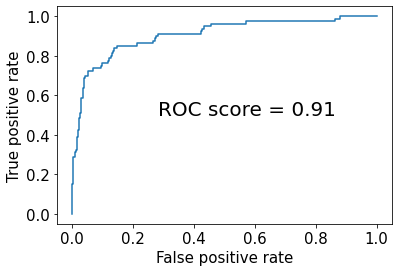

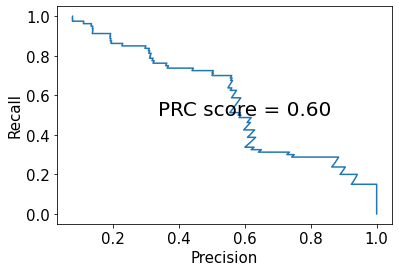

In [31]:
plt.rcParams.update({'font.size': 15})


text = "ROC score = %.2f" % roc_score

fig, ax = plt.subplots()
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(0.3, 0.5, text, fontsize=20, transform=ax.transAxes)

plt.show()




text = "PRC score = %.2f" % prc_score

fig, ax = plt.subplots()
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.text(0.3, 0.5, text, fontsize=20, transform=ax.transAxes)


plt.show()

# Old scores
- **ChemProp**, last model: 
    - val: 0.93 ROC, 0.71 PRC
    - test: 0.93 ROC, **0.70 PRC**
    
- **ChemProp**, "best" model: 

    - test: 0.90 ROC, **0.59 PRC**
    
- **CpSchnet**, last model: 
    - val: 0.92 ROC, 0.58 PRC
    - test: 0.92 ROC, **0.60 PRC**
    
- **CpSchnet**, "best model: 

    - test: 0.91 ROC, **0.58 PRC**
    